In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [48]:
Ngrid = 201
Npts = 1000
G = 1.0
dx = 1.0/Ngrid
phi_array = np.zeros([Ngrid,Ngrid])
rho_array = np.zeros([Ngrid,Ngrid])

#rho_array[Ngrid//2,Ngrid//2] = 1.0

for i in range(Npts):
    rho_array[np.random.randint(4,Ngrid-4),np.random.randint(4,Ngrid-4)] += 1.0

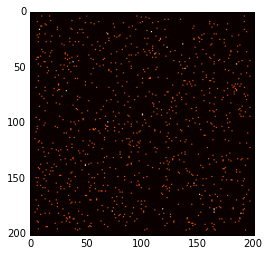

In [49]:
plt.imshow(rho_array,cmap='hot')

In [50]:
x = rho_array[1:-1,1:-1]
x.shape

(199, 199)

In [51]:
for n in range(400):
    new_phi_array = np.zeros_like(phi_array)
    
    new_phi_array[1:-1,1:-1] = np.pi * G * rho_array[1:-1,1:-1] + \
        0.25 * dx**2 * (phi_array[2:,1:-1] + phi_array[:-2,1:-1] + phi_array[1:-1,2:] + phi_array[1:-1,:-2])

    phi_array = np.copy(new_phi_array)


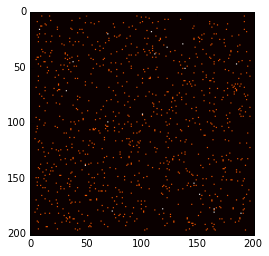

In [52]:
plt.imshow(phi_array,cmap='hot')

In [53]:
print(phi_array.min(),phi_array.max())

0.0 6.28320474821


In [12]:
Ngrid = 101  # should be an odd number and include 1 ghost zone.
Nstars = 100 
Lbox  = 1.0  # in units of parsecs
Mstar = 1.0  # solar masses
dx = Lbox / float(Ngrid)  # still in units of parsecs

import numpy as np

rho_star = Mstar*1.989e33/(Lbox*3.0857e+18)**3  # 

single_star_array = np.zeros([Ngrid,Ngrid,Ngrid])
many_star_array = np.zeros([Ngrid,Ngrid,Ngrid])

cen = Ngrid // 2

single_star_array[cen,cen,cen] += rho_star

for i in range(Nstars):
    many_star_array[np.random.randint(4,Ngrid-4),
                    np.random.randint(4,Ngrid-4),
                    np.random.randint(4,Ngrid-4)] += rho_star

starproj = np.sum(many_star_array,axis=2)

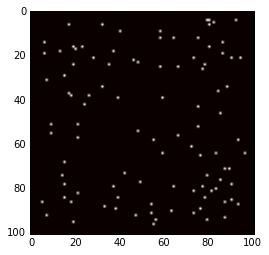

In [13]:
#plt.imshow(single_star_array[:,:,cen],cmap='hot')
plt.imshow(starproj,cmap='hot')
